# Načítání souborů

In [1]:
import pandas as pd
import numpy as np 
import glob

In [2]:
# files = glob.glob("dataset\*.csv")
files=['dataset\\test.csv', 'dataset\\train.csv']

In [3]:
files

['dataset\\test.csv', 'dataset\\train.csv']

In [4]:
df_list = []
for f in files:
    df_list.append(pd.read_csv(f))

df = pd.concat(df_list, axis=0, ignore_index=True)

In [5]:
string_columns = df.dtypes.loc[df.dtypes == object].index.to_list()
numerical_columns = df.dtypes.loc[df.dtypes != object].index.to_list()

In [6]:
df.shape

(2919, 81)

# Kontrola NaN hodnot

In [7]:
nan_count=df.isna().sum()
nan_count_sorted_df = nan_count[nan_count>0].sort_values(ascending=False).to_frame("NaN Counts")
nan_count_sorted_df["Percentage"] = nan_count_sorted_df["NaN Counts"] / df.shape[0] * 100

In [8]:
# formátování výstupu numerických hodnot
nan_count_sorted_df.style.format({"NaN Counts": '{:,}'.format, "percentage": '{:,.2f}'.format})

,NaN Counts,Percentage
PoolQC,"2,909",99.657417
MiscFeature,"2,814",96.402878
Alley,"2,721",93.216855
Fence,"2,348",80.438506
SalePrice,"1,459",49.982871
FireplaceQu,"1,420",48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


# Analýza bez cílu

In [9]:
df.loc[:,numerical_columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
df.loc[:,string_columns].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


# Analýza s konkrétním cílem
SalePrice

In [11]:
df.loc[:,"SalePrice"].isna().sum()

1459

In [12]:
df = df.loc[df.SalePrice.notna(),:]

In [13]:
df.shape

(1460, 81)

<AxesSubplot:>

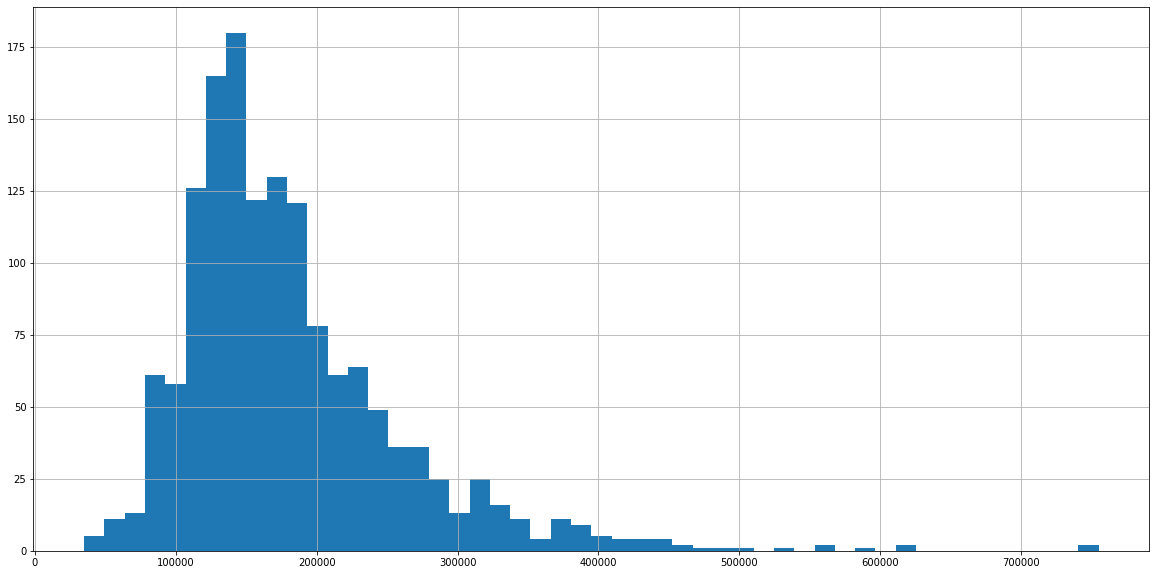

In [14]:
df.SalePrice.hist(bins=50, figsize=(20,10))

In [15]:
# Korelační analýza
df.loc[:, numerical_columns].corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

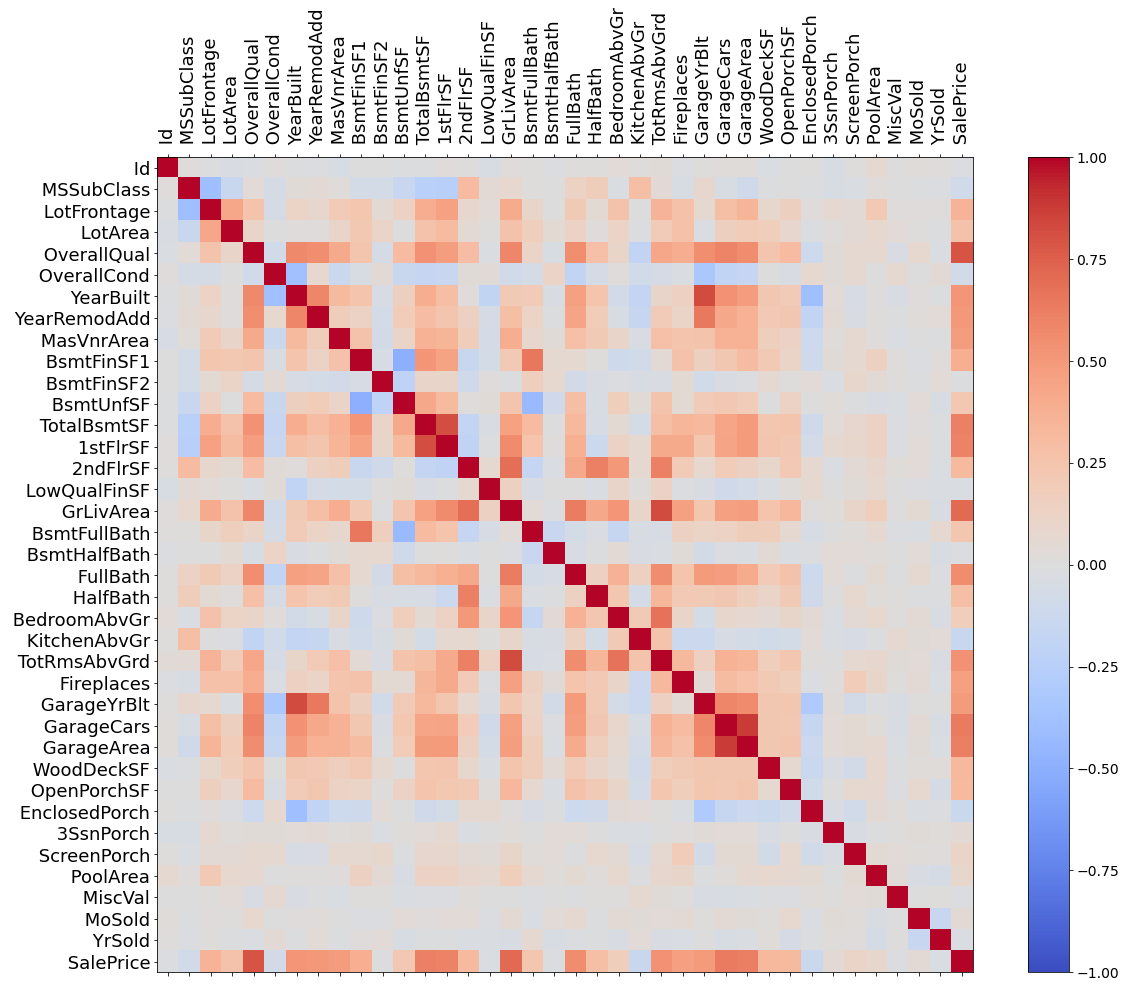

In [16]:
# Korelační matice numerických hodnot

import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

# Now we plot correlation of attributes
x = df.loc[:,numerical_columns]
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

# Analýza stringových hodnot

<AxesSubplot:>

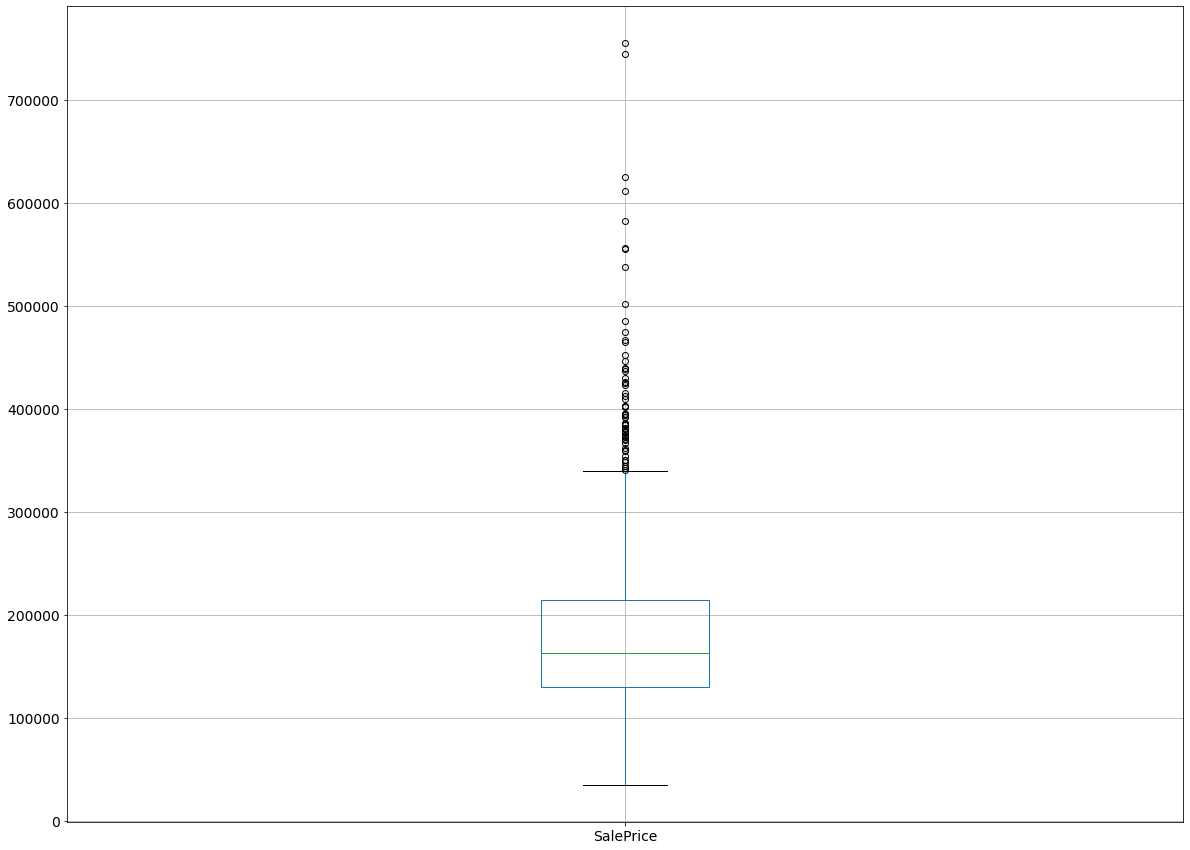

In [17]:
df.loc[:,"SalePrice"].to_frame().boxplot()

<AxesSubplot:title={'center':'SalePrice'}, xlabel='MSZoning'>

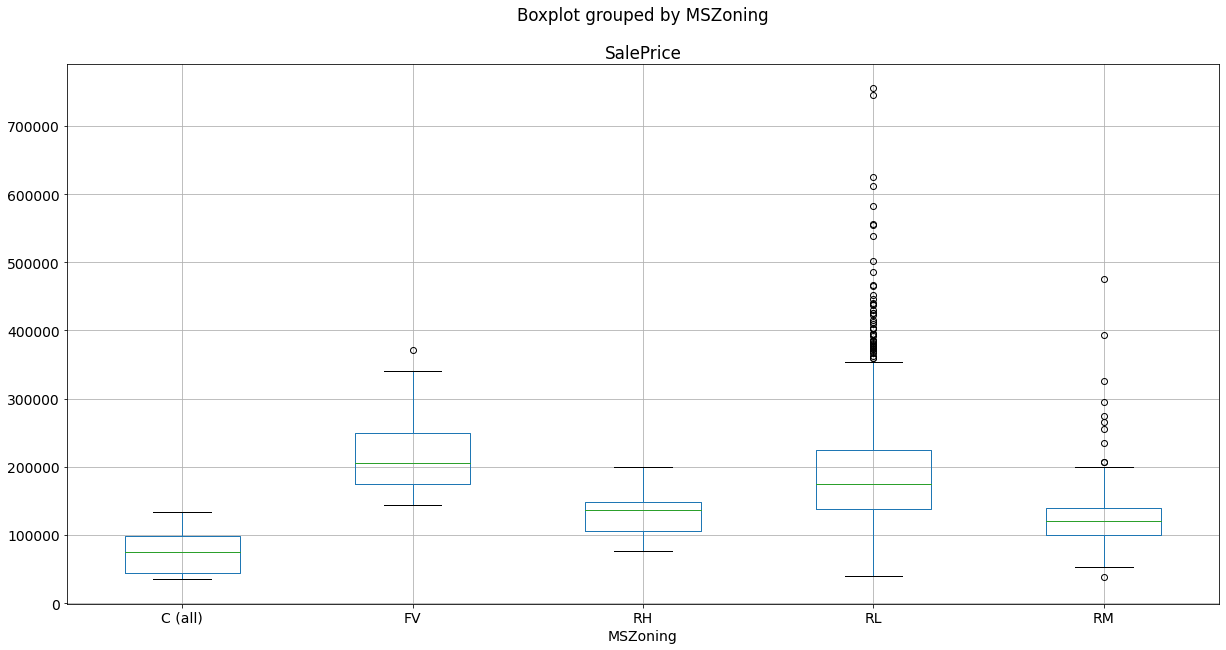

In [24]:
plt.rcParams['figure.figsize'] = 20, 10
dic = {"size": 14}
matplotlib.rc('font', **dic)

df.boxplot(column=["SalePrice"], by="MSZoning")

<AxesSubplot:title={'center':'SalePrice'}, xlabel='GarageType'>

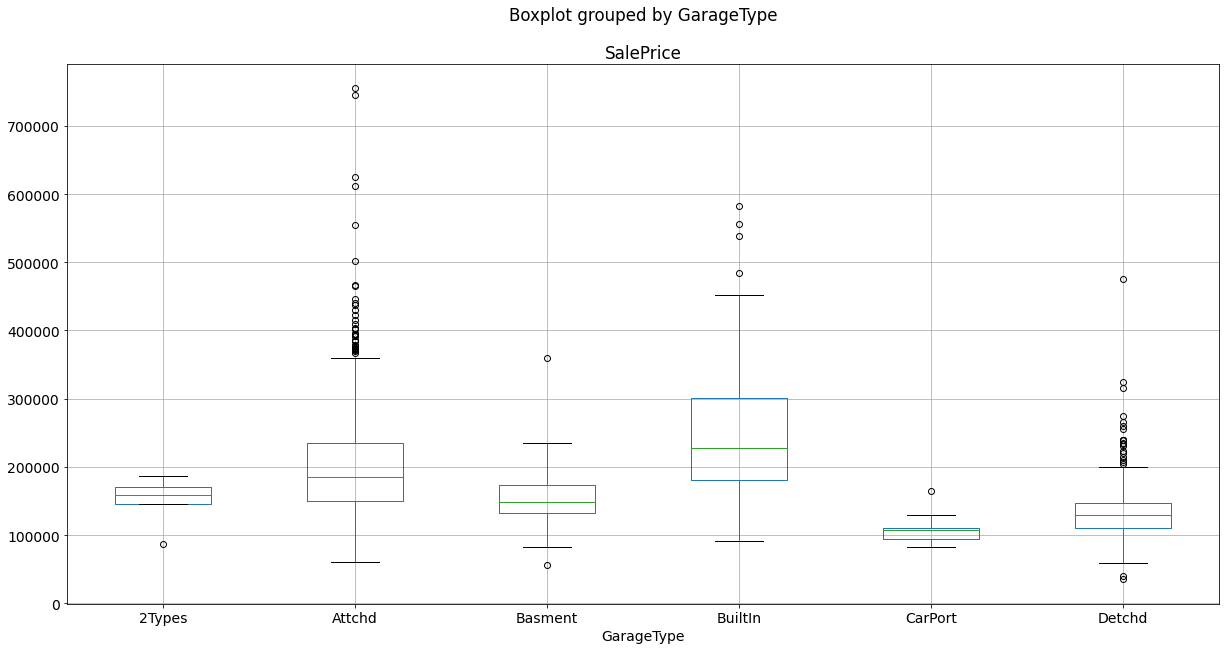

In [25]:
df.boxplot("SalePrice", by="GarageType")